In [1]:
import pandas as pd
import numpy as np

In [2]:
## Leer data frame
df=pd.read_csv('train.csv')

In [3]:
# Primeras 5 filas
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
# Ultimas 5 filas
df.tail(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [5]:
# que tan grande es el data frame
df.shape

(891, 12)

In [6]:
# ¿Cual es el tercer pasajero?
df.iloc[3]

PassengerId                                               4
Survived                                                  1
Pclass                                                    1
Name           Futrelle, Mrs. Jacques Heath (Lily May Peel)
Sex                                                  female
Age                                                    35.0
SibSp                                                     1
Parch                                                     0
Ticket                                               113803
Fare                                                   53.1
Cabin                                                  C123
Embarked                                                  S
Name: 3, dtype: object

In [7]:
# con query buscas
df.query('PassengerId == 3')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.925,NaN,S


In [8]:
# ¿cual es el quinceavo?
df.query('PassengerId == 15')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
14,15,0,3,"Vestrom, Miss. Hulda Amanda Adolfina",female,14.0,0,0,350406,7.8542,NaN,S


In [9]:
## ¿Cómo obtener una columna?
df['Pclass']

0      3
1      1
2      3
3      1
4      3
      ..
886    2
887    1
888    3
889    1
890    3
Name: Pclass, Length: 891, dtype: int64

In [10]:
# int (entero), float(decimal), object(string o palabra)
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [11]:
## ¿Cómo obtener una columna de X pasajero?
df.query('PassengerId == 20')['Survived']

19    1
Name: Survived, dtype: int64

In [12]:
## ¿Cómo obtener una columna de X pasajero?
df.query('PassengerId > 800')['Survived']

800    0
801    1
802    1
803    1
804    1
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 91, dtype: int64

In [13]:
# cuantos sobrevivieron, repaso ciclo for 
suma_sobrevive=0
for i in df.Survived:
    suma_sobrevive=suma_sobrevive+i
suma_sobrevive

342

In [14]:
# Porcentaje de supervicencia
suma_sobrevive/len(df)

0.3838383838383838

In [15]:
# con pandas
df.Survived.sum()

342

In [16]:
# Promedios de 1 y 0 es el porcentaje
df.Survived.mean()

0.3838383838383838

In [17]:
### ¿Cuál es la Edad promedio?
df.Age.mean()

29.69911764705882

In [18]:
np.mean(df.Age)

29.69911764705882

In [19]:
## ¿Que hay más, hombres o mujeres?
total_male=len(df.query("Sex == 'male'"))
total_female=len(df.query("Sex == 'female'"))
total_male,total_female

(577, 314)

In [20]:
(total_female/len(df)),(total_male/len(df))

(0.35241301907968575, 0.6475869809203143)

In [21]:
df['is_female']=df.Sex=='female'
df.is_female

0      False
1       True
2       True
3       True
4      False
       ...  
886    False
887     True
888     True
889    False
890    False
Name: is_female, Length: 891, dtype: bool

In [22]:
df.is_female.mean()

0.35241301907968575

In [23]:
## ¿Dentro de los que sobrevivieron, que sexo más?
df.query("Survived==1").is_female.mean()

0.6812865497076024

In [24]:
df_survived=df[df.Survived != 0]
df_survived.is_female.mean()

0.6812865497076024

In [25]:
df.groupby('Survived').agg({'Age':'mean'})

,Age
Survived,
0,30.626179
1,28.343690


In [26]:
df.query('Age == 80')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,is_female
630,631,1,1,"Barkworth, Mr. Algernon Henry Wilson",male,80.0,0,0,27042,30.0,A23,S,False


In [27]:
df.Age.describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [28]:
df['is_very_young']=df.Age<10

In [29]:
df.query("is_very_young==1").Survived.mean()

0.6129032258064516

In [30]:
df.query("is_very_young==1 and Sex=='female'").Survived.mean()

0.6333333333333333

In [31]:
df.query("is_very_young==1 and Sex=='male'").Survived.mean()

0.59375

In [32]:
df.Survived.mean()

0.3838383838383838

In [33]:
# ¿que onda con la edad?


In [34]:
df.groupby('Pclass').agg({'Age':'mean',
                          'Survived':['mean','count']})

Age  Survived      
             mean      mean count
Pclass                           
1       38.233441  0.629630   216
2       29.877630  0.472826   184
3       25.140620  0.242363   491

In [35]:
import matplotlib.pyplot as plt

(array([ 54.,  46., 177., 169., 118.,  70.,  45.,  24.,   9.,   2.]),
 array([ 0.42 ,  8.378, 16.336, 24.294, 32.252, 40.21 , 48.168, 56.126,
        64.084, 72.042, 80.   ]),
 <BarContainer object of 10 artists>)

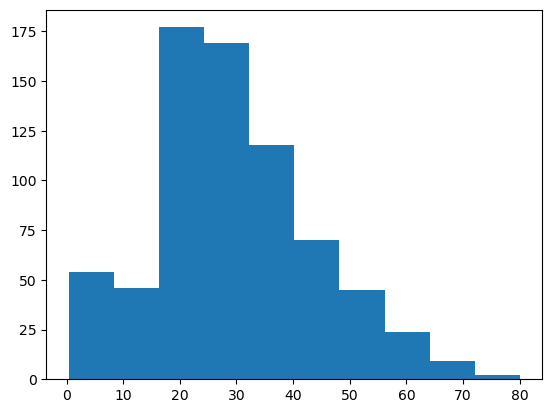

In [36]:
plt.hist(df.Age)

In [37]:
df.query("Age>65")

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,is_female,is_very_young
33,34,0,2,"Wheadon, Mr. Edward H",male,66.0,0,0,C.A. 24579,10.5000,NaN,S,False,False
96,97,0,1,"Goldschmidt, Mr. George B",male,71.0,0,0,PC 17754,34.6542,A5,C,False,False
116,117,0,3,"Connors, Mr. Patrick",male,70.5,0,0,370369,7.7500,NaN,Q,False,False
493,494,0,1,"Artagaveytia, Mr. Ramon",male,71.0,0,0,PC 17609,49.5042,NaN,C,False,False
630,631,1,1,"Barkworth, Mr. Algernon Henry Wilson",male,80.0,0,0,27042,30.0000,A23,S,False,False
672,673,0,2,"Mitchell, Mr. Henry Michael",male,70.0,0,0,C.A. 24580,10.5000,NaN,S,False,False
745,746,0,1,"Crosby, Capt. Edward Gifford",male,70.0,1,1,WE/P 5735,71.0000,B22,S,False,False
851,852,0,3,"Svensson, Mr. Johan",male,74.0,0,0,347060,7.7750,NaN,S,False,False


In [38]:
#df[df.Age.isna()]['Age']=df.Age.mean()
df.fillna(df.Age.mean())

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,is_female,is_very_young
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,29.699118,S,False,False
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C,True,False
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,29.699118,S,True,False
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S,True,False
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,29.699118,S,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,29.699118,S,False,False
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,B42,S,True,False
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,29.699118,S,True,False
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C148,C,False,False
